The What, Why and How of Dimensionality Reduction
With the abundance of data available, we may find ourselves working with large datasets that contain hundreds or even thousands of features. While having a lot of data might seem like a good thing, too many features can actually become problematic.

The number of features is often referred to as the dimensionality of a dataset, and the set of challenges that come with working with high-dimensional data is notoriously dubbed the curse of dimensionality. In this article, we will take a closer look at the issues that can arise with high-dimensional data and some of the methods we can use to mitigate them.

The curse of dimensionality
In machine learning, there are two main issues with high dimensional data: data sparsity and distance concentration. In the following sections, we’ll delve a little deeper into each one.



Imagine we want to build a model that predicts whether a person will subscribe to an online newspaper based on two features: their browser type and the version of the webpage that they saw. Since we only have two features, all possible combinations of those features might look something like this:

Browser	Version	Subscribed
Chrome	A	1
Safari	A	0
Firefox	A	0
Chrome	B	1
Safari	B	1
Firefox	B	0
To successfully train a model that generalizes to new data, we want our training data to include all of these combinations (at least all of the ones that could exist in new data). For example, if the training dataset does not include any people who used a Chrome browser and saw version A of the website, we can’t expect our model to make accurate predictions for that user. As we increase the dimension of the data, we can see how this quickly becomes a problem.

For example, just by adding one more feature, the total number of possible combinations increases exponentially:

Browser	Version	Source	Subscribed
Chrome	A	Email	1
Safari	A	Email	0
Firefox	A	Email	0
Chrome	B	Email	1
Safari	B	Email	1
Firefox	B	Email	0
Chrome	A	Ad	1
Safari	A	Ad	0
Firefox	A	Ad	1
Chrome	B	Ad	0
Safari	B	Ad	1
Firefox	B	Ad	0
Chrome	A	Google	0
Safari	A	Google	0
Firefox	A	Google	0
Chrome	B	Google	1
Safari	B	Google	0
Firefox	B	Google	0
Realistically, there will be a point when it is not feasible to obtain a large enough sample size to represent all possible combinations of features. Because a supervised model can only learn from what is contained in the training dataset, this can lead to overfitting and lack of generalizability.



Distance concentration
Another issue with high dimensional data is distance concentration. Many machine learning algorithms, such as k-nearest-neighbors and unsupervised clustering methods, involve calculating distances between observations. Observations that are “closer” to each other are clustered together — and are expected to have similar outcomes.

It turns out that, as the number of dimensions increases, the distance between all pairs of data points becomes increasingly similar. In other words, it becomes more difficult to discern whether two observations are any more or less similar to each other than to any other observation.

Dimensionality reduction techniques
So how can we mitigate these issues brought on by high-dimensional data? One approach is to use feature selection methods to retain only a certain subset of features in our dataset.

Another way to reduce dimensionality is to collapse the most relevant information across multiple features into a lower-dimensional space. We introduce three of the most common dimensionality reduction techniques below.

Principal component analysis (PCA)
Principal component analysis (PCA) is an unsupervised learning algorithm that transforms high-dimensional data into a smaller number of features using principal components (PCs). The goal is to preserve as much variance and information from the original data in a lower-dimensional space. The new features generated by PCA are linear combinations of the original features.

Linear discriminant analysis (LDA)
Like PCA, Linear discriminant analysis (LDA) can be used to transform data into new features that are linear combinations of the original ones. However, instead of maximizing the preserved variance from the original data, LDA works by maximizing the differences between known classes such that they are well separated in lower dimensional space.

T-distributed stochastic neighbor embedding (t-SNE)
T-distributed stochastic neighbor embedding (t-SNE) is another dimensionality reduction technique, but it uses a nonlinear method to map each data point from a high-dimensional space to a 2- or 3-dimensional space. As its name implies, t-SNE uses the student t-distribution to model the points in a way such that similar points are mapped closer to each other and dissimilar points are further apart. As a result, t-SNE is great at preserving the local structure of the original data.

Conclusion
Having a large number of features in a dataset can prove to be both a blessing and a curse. While there is the potential to contribute useful information, high-dimensional data also drastically increases the need for more data points in order to fill the space generated by the added dimensions. Otherwise, some machine learning algorithms can become ineffective or models might not be generalizable. Luckily, there are many dimensionality reduction techniques that can be used to mitigate these issues by transforming the data to a lower-dimensional space while still preserving the most relevant information from the original features.

Introduction to Implementing PCA
In this lesson, we will be implementing Principal Component Analysis (PCA) using the Python libraries NumPy and scikit-learn.

The motivation of Principal Component Analysis (PCA) is to find a new set of features that are ordered by the amount of variation (and therefore, information) they contain. We can then select a subset of these PCA features. This leaves us with lower-dimensional data that still retains most of the information contained in the larger dataset.

In this lesson, we will:

Implement PCA in NumPy step-by-step
Implement PCA in scikit-learn using only a few lines of code
Use principal components to train a machine learning model
Visualize principal components using image data
For the next few exercises, we will use a dataset that describes several types of dry beans separated into seven categories.

We will begin by taking a look at the features that describe different categories of beans.

In [3]:
import pandas as pd
#import codecademylib3

# Read the csv data as a DataFrame
df = pd.read_csv('Dry_Bean.csv')

# Remove null and na values
df.dropna()

# 1. Print the DataFrame head
print(df.head())

# 2. Extract the numerical columns
data_matrix = df.drop(columns='Class')

# Extract the classes
classes = df['Class']

print(data_matrix)


    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

Implementing PCA in NumPy I
In this exercise, we will perform PCA using the NumPy method np.linalg.eig, which performs eigendecomposition and outputs the eigenvalues and eigenvectors.

The eigenvalues are related to the relative variation described by each principal component. The eigenvectors are also known as the principal axes. They tell us how to transform (rotate) our data into new features that capture this variation.



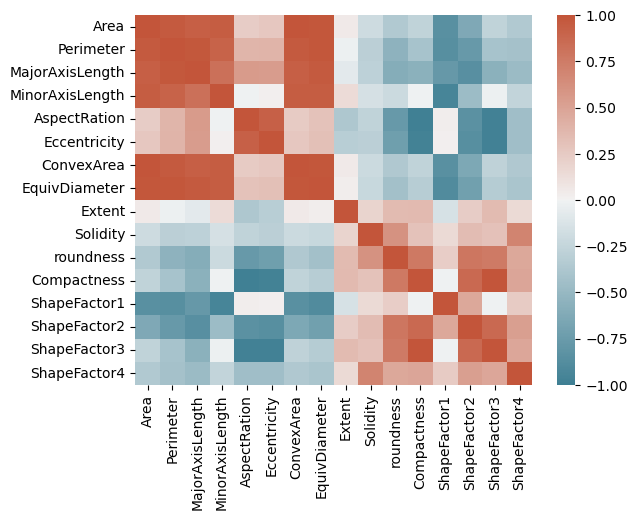

eigenvectors: 
[[ 2.82457959e-01  2.45882017e-01 -6.14466787e-02 -3.15461931e-02
  -9.13256234e-02 -3.66390029e-01  1.25044861e-01  7.17479179e-02
   3.50665669e-02 -3.90419516e-01 -1.77686475e-01  5.44842282e-02
   4.62948861e-02  6.55727948e-01  2.31435926e-01  1.33190281e-01]
 [ 3.10891123e-01  1.79302922e-01 -1.88525952e-02 -4.24678975e-02
   8.18198663e-02 -1.02508210e-02  8.15296990e-02  3.17295058e-02
  -1.57501171e-01  3.44383066e-01  1.99453621e-01 -7.50549982e-01
   3.17920275e-01  8.13901113e-02  1.46143834e-02  1.26584691e-02]
 [ 3.25823976e-01  1.00756516e-01 -8.46919067e-02 -6.79308126e-03
  -4.42163116e-02 -1.49091929e-02  1.18162546e-01 -2.00947006e-01
  -3.52366452e-01  1.01996482e-01  1.73639683e-01  2.73549959e-02
  -6.85301970e-01 -1.86251185e-01  3.46019418e-01  1.74431583e-01]
 [ 2.36199383e-01  3.43460651e-01  7.50039030e-03 -6.12997105e-02
  -4.29258549e-03 -2.78820146e-02 -6.23528140e-02  9.47252766e-02
   4.14230636e-01  4.81150315e-01  4.73720993e-03  4.13935

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import codecademylib3


#data_matrix = pd.read_csv('./data_matrix.csv')
df = pd.read_csv('Dry_Bean.csv')

# Remove null and na values
df.dropna()

# 1. Print the DataFrame head
#print(df.head())

# 2. Extract the numerical columns
data_matrix = df.drop(columns='Class')

# 1. Use the `.corr()` method on `data_matrix` to get the correlation matrix 
correlation_matrix = data_matrix.corr()

## Heatmap code:
red_blue = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, cmap=red_blue)
plt.show()

# 2. Perform eigendecomposition using `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# 3. Print out the eigenvectors and eigenvalues
print('eigenvectors: ')
print(eigenvectors)

print('eigenvalues: ')
print(eigenvalues)



Implementing PCA in NumPy II - Analysis
After performing PCA, we generally want to know how useful the new features are. One way to visualize this is to create a scree plot, which shows the proportion of information described by each principal component.

The proportion of information explained is equal to the relative size of each eigenvalue:

In [6]:
info_prop = eigenvalues / eigenvalues.sum()
print(info_prop)

[5.54664386e-01 2.64309732e-01 8.00656422e-02 5.11408029e-02
 2.73929290e-02 1.14976093e-02 6.97650724e-03 3.25082500e-03
 5.16266295e-04 9.08681206e-05 6.58867938e-05 1.83739336e-05
 9.29966038e-06 6.25641679e-07 1.11549485e-07 1.34132086e-07]


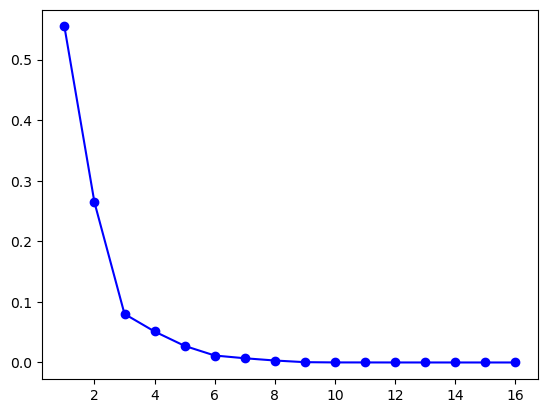

In [7]:
#To create a scree plot, we can then plot these relative proportions:
plt.plot(np.arange(1,len(info_prop)+1),
         info_prop, 
         'bo-')
plt.show()

From this plot, we see that the first principal component explains about 50% of the variation in the data, the second explains about 30%, and so on.

Another way to view this is to see how many principal axes it takes to reach around 95% of the total amount of information. Ideally, we’d like to retain as few features as possible while still reaching this threshold.

To do this, we need to calculate the cumulative sum of the info_prop vector we created earlier:

In [8]:
cum_info_prop = np.cumsum(info_prop)


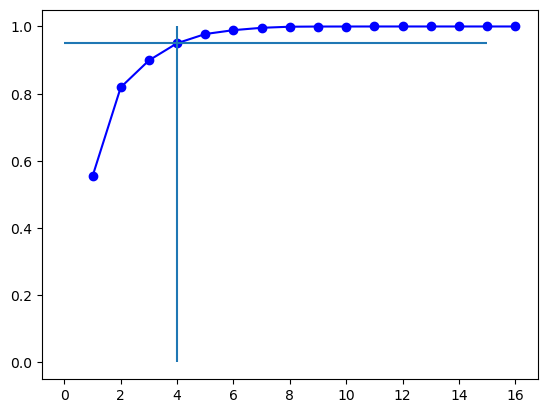

In [9]:
#We can then plot these values using matplotlib:

plt.plot(np.arange(1,len(info_prop)+1),
         cum_info_prop, 
         'bo-')
plt.hlines(y=.95, xmin=0, xmax=15)
plt.vlines(x=4, ymin=0, ymax=1)
plt.show()

In [ ]:
From this plot, we see that four principal axes account for 95% of the variation in the data.

Implementing PCA using Scikit-Learn
Another way to perform PCA is using the scikit-learn module sklearn.decomposition.PCA.

The steps to perform PCA using this method are:

Standardize the data matrix. This is done by subtracting the mean and dividing by the standard deviation of each column vector.

In [11]:
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_standardized = (data_matrix - mean) / sttd

Perform eigendecomposition by fitting the standardized data. We can access the eigenvectors using the components_ attribute and the proportional sizes of the eigenvalues using the explained_variance_ratio_ attribute.

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
components = pca.fit(data_standardized).components_
components = pd.DataFrame(components).transpose()
components.index =  data_matrix.columns
print(components)

                       0         1         2         3         4         5   \
Area             0.282458  0.245882 -0.061447 -0.031546 -0.091326  0.366390   
Perimeter        0.310891  0.179303 -0.018853 -0.042468  0.081820  0.010251   
MajorAxisLength  0.325824  0.100757 -0.084692 -0.006793 -0.044216  0.014909   
MinorAxisLength  0.236199  0.343461  0.007500 -0.061300 -0.004293  0.027882   
AspectRation     0.229298 -0.330844 -0.169058  0.053646 -0.024757 -0.075970   
Eccentricity     0.231526 -0.319434 -0.163042  0.118389 -0.060304  0.190428   
ConvexArea       0.283200  0.244630 -0.053649 -0.030960 -0.089113  0.369216   
EquivDiameter    0.297484  0.222802 -0.049914 -0.032427 -0.021953  0.033515   
Extent          -0.059808  0.220619 -0.085258  0.948254  0.197599 -0.000511   
Solidity        -0.143016  0.103322 -0.738670 -0.049546 -0.282194 -0.325693   
roundness       -0.248165  0.214805 -0.163325  0.067482 -0.648701  0.173439   
Compactness     -0.238378  0.328914  0.149701 -0.087

In [14]:
var_ratio = pca.explained_variance_ratio_
var_ratio = pd.DataFrame(var_ratio).transpose()
print(var_ratio)

         0        1         2         3         4         5         6   \
0  0.554664  0.26431  0.080066  0.051141  0.027393  0.011498  0.006977   

         7         8         9         10        11        12            13  \
0  0.003251  0.000516  0.000091  0.000066  0.000018  0.000009  6.256417e-07   

             14            15  
0  1.341321e-07  1.115495e-07  


Projecting the Data onto the principal Axes
Once we have performed PCA and obtained the eigenvectors, we can use them to project the data onto the first few principal axes. We can do this by taking the dot product of the data and eigenvectors, or by using the sklearn.decomposition.PCA module as follows:

        PC1       PC2       PC3       PC4
0 -4.981378  1.824630  0.748993 -0.390797
1 -5.436593  2.932257  2.182294 -0.431944
2 -4.757913  1.826817  0.514019 -0.125849
3 -4.300383  2.003587  3.554316  0.082961
4 -6.349107  4.088055  1.179156 -0.830327


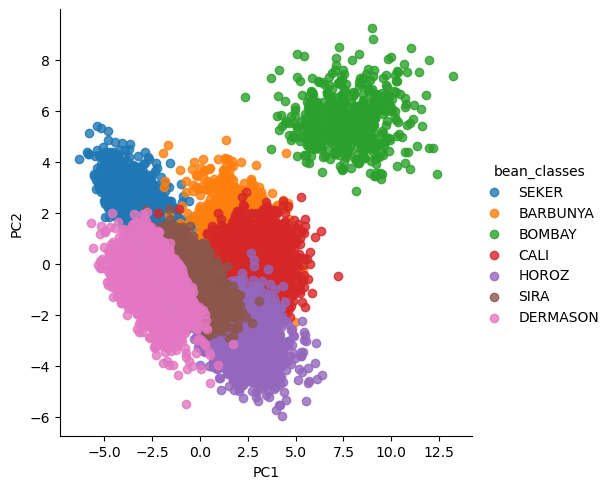

In [15]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
#import codecademylib3
import matplotlib.pyplot as plt
import seaborn as sns

#data_matrix_standardized = pd.read_csv('./data_matrix_standardized.csv')
#classes = pd.read_csv('./classes.csv')['Class']

# 1. Transform the data into 4 new features using the first PCs
pca = PCA(n_components = 4)
data_pcomp = pca.fit_transform(data_standardized)
data_pcomp = pd.DataFrame(data_pcomp)
data_pcomp.columns = ['PC1', 'PC2', 'PC3', 'PC4']
print(data_pcomp.head())

## 2. Plot the first two principal components colored by the bean classes

data_pcomp['bean_classes'] = classes
sns.lmplot(x='PC1', y='PC2', data=data_pcomp, hue='bean_classes', fit_reg=False)
plt.show()

In [ ]:
Do you notice any clustering occurring?

PCA as Features
So far we have used PCA to find principal axes and project the data onto them. We can use a subset of the projected data for modeling, while retaining most of the information in the original (and higher-dimensional) dataset.

For example, recall in the previous exercise that the first four principal axes already contained 95% of the total amount of variance (or information) in the original data. We can use the first four components to train a model, just like we would on the original 16 features.

Because of the lower dimensionality, we should expect training times to be faster. Furthermore, the principal axes ensure that each new feature has no correlation with any other, which can result in better model performance.

In this checkpoint, we will be using the first four principal components as our training data for a Support Vector Classifier (SVC). We will compare this to a model fit with the entire dataset (16 features) using the average likelihood score. Average likelihood is a model evaluation metric; the higher the average likelihood, the better the fit.

In [17]:
print(classes)

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object


In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
 
 
data_matrix_standardized = pd.read_csv('data_matrix_standardized.csv')
#data_matrix_standardized = data_standardized
classes = pd.read_csv('classes.csv')
 
# We will use the classes as y
#bleow the Class refres to the column heading, the classes above does not have a column heading
# converts to numerics
y = classes.Class.astype('category').cat.codes

 
# Get principal components with 4 features and save as X
pca_1 = PCA(n_components=4) 
X = pca_1.fit_transform(data_matrix_standardized) 
 
# Split the data into 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train) 
 
# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 4 PCA features: {score_1}')
 
# Split the original data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(data_matrix_standardized, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)
 
# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with original features: {score_2}')


/Users/robertfokming/opt/anaconda3/envs/feature/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Score for model with 4 PCA features: 0.4363312555654497
Score for model with original features: 0.39158504007123773


/Users/robertfokming/opt/anaconda3/envs/feature/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Notice that the score for the model using the first 4 principal components is higher than for the model that was fit with the 16 original features. We only needed 1/4 of the data to get even better model performance!



PCA for Images I
Another way to show the inner workings of PCA is to use an image dataset. An image can be represented as a row in a data matrix, where each feature corresponds to the intensity of a pixel.

In this and the following exercise, we will be using the Olivetti Faces image dataset. We will begin by standardizing the images, and then observing the images of faces themselves.

In the next exercise, we will then transform the original data using PCA and re-plot the images using a subset of the principal components. This will allow us to visualize the mechanism by which PCA retains information in the data while reducing the dimensionality.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/robertfokming/scikit_learn_data
Number of features(pixels) per image: 4096
Square image side length: 64


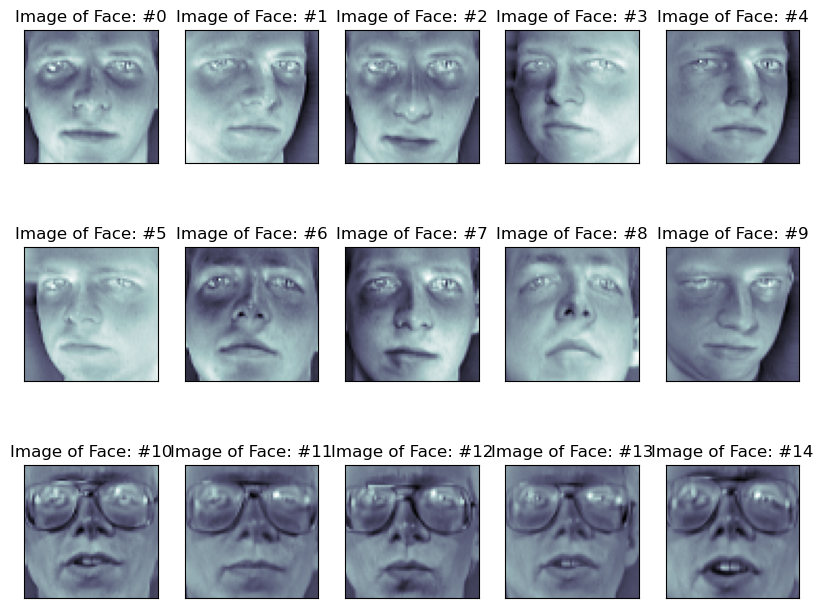

In [22]:
import numpy as np
from sklearn import datasets
#import codecademylib3
import matplotlib.pyplot as plt


# Download the data from sklearn's datasets
faces = datasets.fetch_olivetti_faces()['data']

# 1. Standardize the images using the mean and standard deviation
faces_mean = faces.mean(axis=0)
faces_std = faces.std(axis=0)
faces_standardized = (faces - faces_mean) / faces_std


# 2. Find the number of features per image
n_images, n_features = faces_standardized.shape
side_length = int(np.sqrt(n_features))
print(f'Number of features(pixels) per image: {n_features}')
print(f'Square image side length: {side_length}')


# 3. Plot the images
# Create an empty 10x8 plot
fig = plt.figure(figsize=(10, 8))

# Observe the first 15 images.
for i in range(15):

    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Image of Face: #{i}')

    # Get an image from a row based on the current value of i
    face_image = faces_standardized[i]

    # Reshape this image into side_length x side_length 
    face_image_reshaped = face_image.reshape(side_length, side_length)

    # Show the image
    ax.imshow(face_image_reshaped, cmap=plt.cm.bone)
plt.show()


Now that we have cleaned up the data, we can perform PCA to retrieve the eigenvalues and eigenvectors.

This can be useful in understanding how PCA works! We can visualize the eigenvectors by plotting them. They actually have a name: eigenfaces. The eigenfaces are the building blocks for all the other faces in the data.

We can also visualize the dimensionality reduction that occurs when we transform the original data using a smaller number of principal components. In the code editor, we’ve provided you with code to:

Plot the eigenfaces
Plot the reconstructed faces using a smaller number of transformed features. To start, we’ve used 400 principal components — only 0.9% of the original number of features (pixels)!

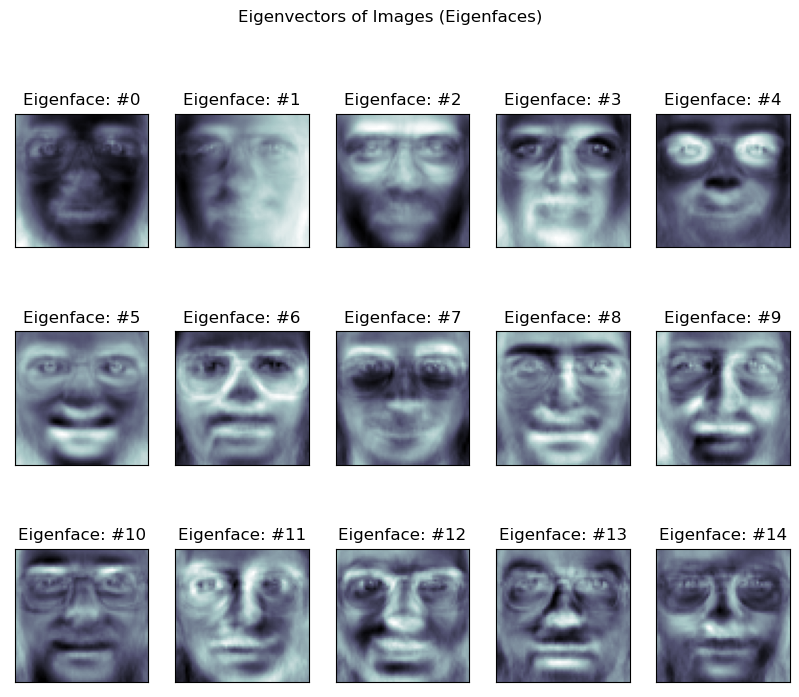

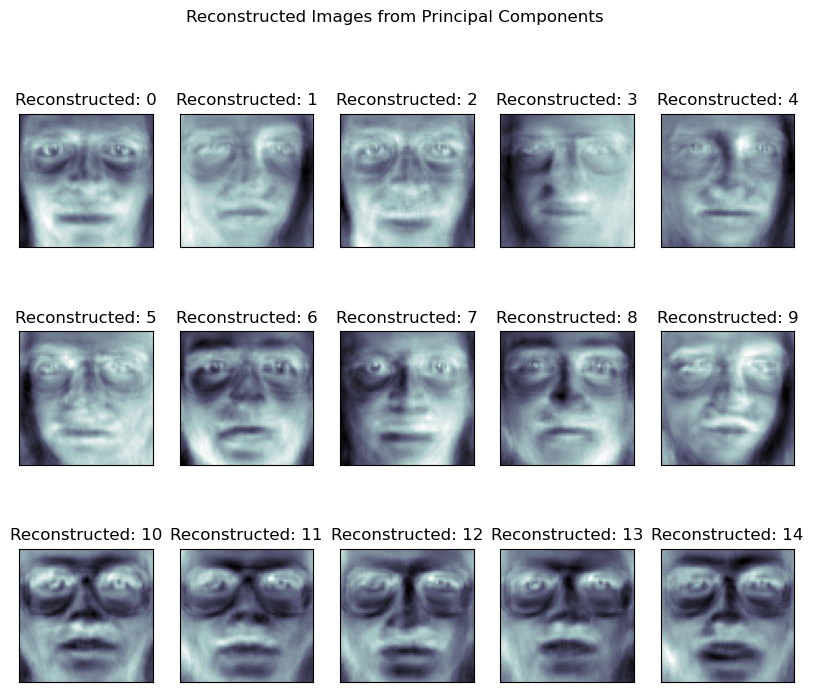

In [24]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
#import codecademylib3
import matplotlib.pyplot as plt


#faces_standardized = pd.read_csv('./faces_standardized.csv').values

# 1. Instantiate a PCA object and fit the standardized faces dataset
pca = PCA(n_components=40) 
pca.fit(faces_standardized)

# 2. Retrieve and plot eigenvectors (eigenfaces)
eigenfaces = pca.components_ 

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface: #{i}')
    
    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]

    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)

    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)
plt.show()

# 3. Reconstruct images from the compressed principal components
# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized) 

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the reconstructed images 
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed: {i}')

    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()


Now, scroll down in the plotting output to view the reconstructed faces. These were constructed using only 400 transformed features. Notice that they look almost identical to the original faces, despite requiring only .9% as much data to store them!